# Monte Carlo Simulation of Geometric Brownian Motion under P and Q Measures

## Theory

Geometric Brownian Motion (GBM) is a continuous-time stochastic process often used to model stock prices. It assumes that the logarithm of the randomly varying quantity follows a Brownian motion with drift.

Under the risk-neutral measure (Q-measure), the stock price follows:

$dS_t = rS_t dt + \sigma S_t dW_t^Q$

Under the real-world measure (P-measure), the stock price follows:

$dS_t = \mu S_t dt + \sigma S_t dW_t^P$

Where:
- $S_t$ is the stock price at time $t$
- $r$ is the risk-free interest rate
- $\mu$ is the drift (expected return) under the real-world measure
- $\sigma$ is the volatility
- $W_t^Q$ and $W_t^P$ are Wiener processes under Q and P measures respectively

## Implementation

Let's break down the code and explain its components:


In [25]:
import numpy as np
import matplotlib.pyplot as plt 


These lines import the necessary libraries: NumPy for numerical computations and Matplotlib for plotting.

### Generating GBM Paths


In [17]:
def GeneratePathGBM(NoOfPaths,NoOfSteps,T,r,sigma,S_0):
    Z=np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    X=np.zeros([NoOfPaths,NoOfSteps+1])
    time=np.zeros([NoOfPaths,NoOfSteps])
    X[:,0]=np.log(S_0)
    dt=T/float(NoOfSteps)
    for i in range(0,NoOfSteps):
        if NoOfPaths>1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
        X[:,i+1]=X[:,i]+(r-0.5*sigma*sigma)*dt+sigma*\
        np.power(dt,0.5)*Z[:,i]
        time[i+1]=time[i]+dt
    S=np.exp(X)
    paths = {"time":time,"S":S}
    return paths
    
        
        


This function generates Monte Carlo paths for GBM:
- It uses the Euler-Maruyama method to discretize the SDE.
- It generates random normal variables for the Wiener process increments.
- It calculates the log-returns and then exponentiates to get the stock price paths.

### Main Simulation Code


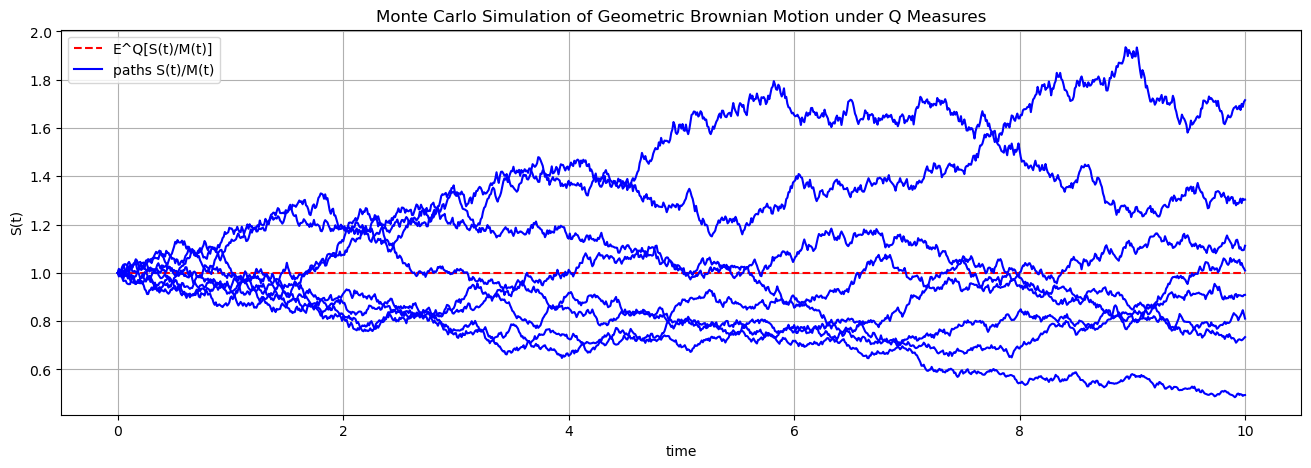

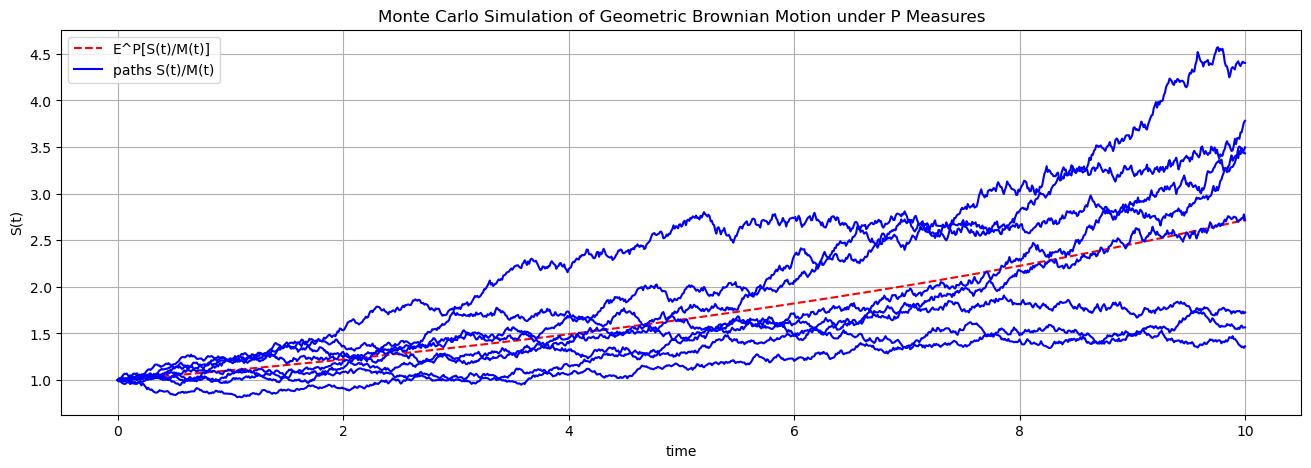

In [24]:
def MainCode():
    NoOfPaths = 8
    NoOfSteps = 1000
    S_0       = 1
    r         = 0.05
    mu        = 0.15
    sigma     = 0.1
    T         = 10
    # Money savings account
    M         = lambda t: np.exp(r * t)
    
    # Monte Carlo Paths

    pathsQ    = GeneratePathsGBM(NoOfPaths,NoOfSteps,T,r,sigma,S_0)
    S_Q       = pathsQ["S"]
    pathsP = GeneratePathsGBM(NoOfPaths,NoOfSteps,T,mu,sigma,S_0)
    S_P = pathsP["S"]
    time= pathsQ["time"]    
    
    # Discounted Stock paths
    S_Qdisc = np.zeros([NoOfPaths,NoOfSteps+1])
    S_Pdisc = np.zeros([NoOfPaths,NoOfSteps+1])
    i = 0
    for i, ti in enumerate(time):
        S_Qdisc[:, i] = S_Q[:,i]/M(ti) 
        S_Pdisc[:, i] = S_P[:,i]/M(ti) 
    
    # S(T)/M(T) with Stock growing with rate r
    plt.figure(1,figsize=(16,5))
    plt.title('Monte Carlo Simulation of Geometric Brownian Motion under Q Measures')
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("S(t)")
    eSM_Q = lambda t: S_0 * np.exp(r *t) / M(t)
    plt.plot(time,eSM_Q(time),'r--')
    plt.plot(time, np.transpose(S_Qdisc),'blue')   
    plt.legend(['E^Q[S(t)/M(t)]','paths S(t)/M(t)'])
    
    # S(T)/M(T) with Stock growing with rate mu
    plt.figure(2,figsize=(16,5))
    plt.title('Monte Carlo Simulation of Geometric Brownian Motion under P Measures')
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("S(t)")
    eSM_P = lambda t: S_0 * np.exp(mu *t) / M(t)
    plt.plot(time,eSM_P(time),'r--')
    plt.plot(time, np.transpose(S_Pdisc),'blue')   
    plt.legend(['E^P[S(t)/M(t)]','paths S(t)/M(t)'])
    
MainCode()